<a href="https://colab.research.google.com/github/Matteriegray/AnomalyDetect/blob/main/anamoly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [ ]:
!pip install pyod
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [ ]:
# This is to generate a random dataset
X_train, y_train = generate_data(n_train=200, train_only=True, n_features=2)

In [ ]:
#This is to find the outliers and the normal poits in the given dataset

X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)

In [ ]:
#Here we check he length(no. of elements in the outliers and normal points)

n_outliers = len(X_outliers)
n_inliers = len(X_inliers)

In [ ]:
# We separate the features in the given dataset into different 1D array

f1 = X_train[:,[0]].reshape(-1,1)
f2 = X_train[:,[1]].reshape(-1,1)

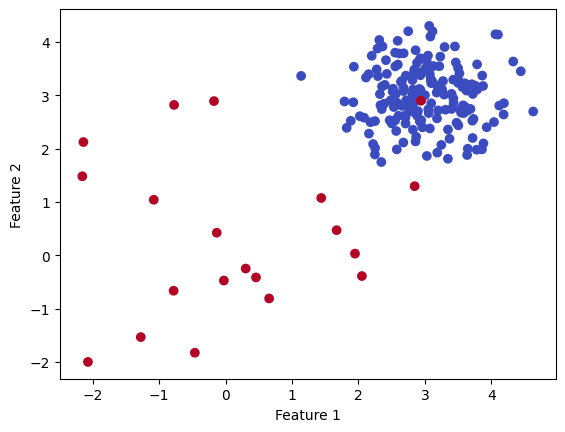

In [ ]:
# Lets plot the scatter plot for the array above

plt.scatter(f1,f2 , c=y_train , cmap = 'coolwarm')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
# Training the KNN classifier

clf = KNN(contamination=0.1)
clf.fit(X_train)

y_pred = clf.predict(X_train)
print(y_pred)

y_error = (y_pred != y_train).sum()
print(y_error)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1]
3


In [ ]:
#Now let's visualize the anamolies in the data
#Lets create a mesh grid

xx, yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
grid = np.c_[xx.ravel(), yy.ravel()]  #Flattening the grid

In [ ]:
#Let there be a threshold value to get the intem if it's outlier or inlier
scores_pred = clf.decision_function(X_train)*-1
threshold = stats.scoreatpercentile(scores_pred, 100 * 0.1)

In [ ]:
#Decision function to calculate the anomaly score for each point

Z = clf.decision_function(grid)*-1
Z = Z.reshape(xx.shape) # This is to convert it back to 2D


[-13.7935196  -13.72429637 -13.72101631 ...  -0.07646349  -0.07482288
  -0.05797775]


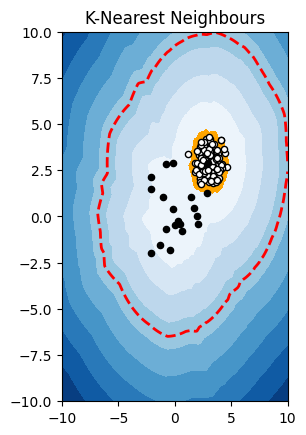

In [ ]:
#Contour plot

#Color map for points from min anomaly score to threshold value
subplot = plt.subplot(1,2,1)
subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Blues_r)

#Color map for points where min anomaly score is equal to threshold value
a = subplot.contour(xx, yy, Z , levels=[threshold], linewidths=2, colors='red')

#Color map for points from threshold score to max anomaly score
# subplot = plt.subplot(1,2,2)
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors = 'orange')

# To mark the inliers
b = subplot.scatter(X_train[:-n_outliers,0], X_train[:-n_outliers,1], c='white', s=20, edgecolor='k')

# To mark the outliers
c = subplot.scatter(X_train[-n_outliers:,0], X_train[-n_outliers:,1], c='black', s=20, edgecolor='k')


if hasattr(a, 'collections') and a.collections:
    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
    )
else:
    print("Warning: No contours found. Check the threshold value.")



subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()